In [2]:
import pandas as pd
import numpy as np
import string
import nltk

df1 = pd.read_csv('train_abridged.csv')
df1 = df1[:1000]
df1['Word'] = df1['Body_Lemm_lower'].astype(str)
df1

,RECORDID,Tags,Vec_Tags,Body,Body_Lemm,Body_Lemm_lower,Body_Token,Body_Length,Title_Lemm,Title_Lemm_lower,...,Unnamed: 1190,Unnamed: 1191,Unnamed: 1192,Unnamed: 1193,Unnamed: 1194,Unnamed: 1195,Unnamed: 1196,Unnamed: 1197,Unnamed: 1198,Word
0,bbfbad0755a14ca7964e3ee747d5097c,"['PowerEdge R620', 'Remove Disclaimer - Copy W...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Table of Contents Before you Begin Rack Ins...,Table Contents Before Begin Rack Installation ...,table contents before begin rack installation ...,"['table', 'contents', 'before', 'begin', 'rack...",400,PowerEdge R620 System Teardown Videos,poweredge r620 system teardown videos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,table contents before begin rack installation ...
1,13bf980141444a379996503f7fb3cd75,"['Dell Storage SCv2020', 'Dell Compellent SC40...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Alert The certificate on the controller is s...,Alert The certificate controller set expire wi...,alert the certificate controller set expire wi...,"['alert', 'the', 'certificate', 'controller', ...",64,How troubleshoot controller certificate set ex...,how troubleshoot controller certificate set ex...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alert the certificate controller set expire wi...
2,94febb2ce4cb4b508aacaa595b35531d,"['Isilon OneFS', 'Remove Disclaimer - Copy Wri...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NaN,NaN,['nan'],1,OneFS 8.0.1 Documentation - Isilon Info Hub,onefs 8.0.1 documentation - isilon info hub,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
3,9e9aa4dd440248a39436cce470eda5b8,"['TechCenter Migration', 'Remove Disclaimer - ...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Creating a DCB Compliant EqualLogic iSCSI SAN ...,Creating DCB Compliant EqualLogic iSCSI SAN Mi...,creating dcb compliant equallogic iscsi san mi...,"['creating', 'dcb', 'compliant', 'equallogic',...",96,Creating-a-dcb-compliant-equallogic-iscsi-san-...,creating-a-dcb-compliant-equallogic-iscsi-san-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,creating dcb compliant equallogic iscsi san mi...
4,26ecd78454b84fb4abfb9730e8debfb7,"['Update', 'Windows 10', 'Install', 'Remove Di...","[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...",A device driver or software driver is a comput...,A device driver software driver computer progr...,a device driver software driver computer progr...,"['a', 'device', 'driver', 'software', 'driver'...",723,Latitude 5401 : Windows 10 Driver installation...,latitude 5401 : windows 10 driver installation...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a device driver software driver computer progr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,62013b68b21d4278ac77cdbdbb979179,"['Dell Endpoint Security Suite Enterprise', 'R...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",style1 font size 12pt style2 font s...,style1 font size 12pt style2 font size 14pt st...,style1 font size 12pt style2 font size 14pt st...,"['style1', 'font', 'size', '12pt', 'style2', '...",245,How Initiate On-Demand Threat Scan Dell Endpoi...,how initiate on-demand threat scan dell endpoi...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,style1 font size 12pt style2 font size 14pt st...
996,b71e3876fa81441ba1f8a0cba79c225f,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",How to disable the disable the Touchpad while ...,How disable disable Touchpad external pointing...,how disable disable touchpad external pointing...,"['how', 'disable', 'disable', 'touchpad', 'ext...",590,Why touchpad disable external mouse attach Del...,why touchpad disable external mouse attach del...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,how disable disable touchpad external pointing...
997,dd537169039c4a6998ce8ca9a8c65afb,"['Video Content', 'Remove Disclaimer - Copy Wr...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NaN,NaN,[],0,System Repair Disc,system repair disc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
998,9c7955b37ac

In [3]:
#Remove punctuation and convert to lower case

df1['Word'] = df1['Body_Lemm_lower'].astype(str)
df1['Word'] = df1['Word'].apply(lambda x :x.translate(str.maketrans('', '', string.punctuation)))
df1['Word'] = df1['Word'].apply(lambda x :x.lower())

In [4]:
#Tokenize and remove stop words
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
stop_words = set(stopwords.words('english')) 
df1['Word'] = df1['Word'].apply(word_tokenize).apply(set).apply(list)

def remove_stopwords(s):
    return [w for w in s if not w in stop_words] 
    
df1['Word'] = df1['Word'].apply(remove_stopwords)

In [8]:
df1['Body_Token']

0      ['table', 'contents', 'before', 'begin', 'rack...
1      ['alert', 'the', 'certificate', 'controller', ...
2                                                ['nan']
3      ['creating', 'dcb', 'compliant', 'equallogic',...
4      ['a', 'device', 'driver', 'software', 'driver'...
                             ...                        
995    ['style1', 'font', 'size', '12pt', 'style2', '...
996    ['how', 'disable', 'disable', 'touchpad', 'ext...
997                                                   []
998    ['quick', 'links', 'getting', 'started', 'dell...
999    ['dell', 'command', 'update', 'require', 'admi...
Name: Body_Token, Length: 1000, dtype: object

In [7]:
df1['Word']

0      [rubber, common, damage, cool, perform, inform...
1      [encrypting, certificate, controller, administ...
2                                                  [nan]
3      [ps, version, conjunction, 5, result, mixed, s...
4      [site, note, ax200, operation, definition, con...
                             ...                        
995    [style1, 0, version, note, 4310039, enterprise...
996    [ps, inspiron, note, operation, 7500, value, p...
997                                                [nan]
998    [persona, stolen, part, 1, crashes, library, a...
999    [firmware, 2018, control, 7, also, perform, in...
Name: Word, Length: 1000, dtype: object

In [11]:
#Creating a combined list of all words
all_words = []
for i in range(len(df1)):
    all_words += df1['Word'][i]

from nltk import FreqDist
word_freq = nltk.FreqDist(all_words)

In [12]:
word_freq.most_common()

[('dell', 704),
 ('1', 662),
 ('article', 613),
 ('use', 550),
 ('system', 548),
 ('2', 541),
 ('information', 530),
 ('support', 490),
 ('provide', 474),
 ('3', 447),
 ('may', 416),
 ('follow', 413),
 ('summary', 399),
 ('note', 391),
 ('issue', 385),
 ('4', 373),
 ('windows', 362),
 ('5', 357),
 ('click', 355),
 ('back', 354),
 ('table', 333),
 ('version', 318),
 ('please', 311),
 ('update', 309),
 ('7', 308),
 ('download', 307),
 ('device', 301),
 ('6', 295),
 ('network', 293),
 ('reference', 292),
 ('step', 291),
 ('select', 290),
 ('driver', 288),
 ('user', 284),
 ('available', 283),
 ('contents', 282),
 ('10', 277),
 ('install', 276),
 ('run', 275),
 ('0', 272),
 ('top', 270),
 ('server', 267),
 ('8', 265),
 ('category', 261),
 ('instal', 259),
 ('power', 258),
 ('see', 258),
 ('need', 255),
 ('error', 255),
 ('data', 251),
 ('software', 251),
 ('change', 251),
 ('page', 248),
 ('button', 247),
 ('list', 246),
 ('guide', 243),
 ('type', 243),
 ('find', 237),
 ('set', 235),
 ('com

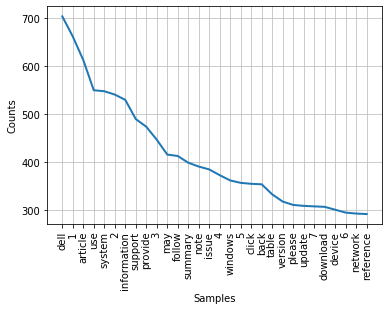

In [14]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
word_freq.plot(30,cumulative=False)
plt.show()

In [18]:
df1['Body_Lemm_lower'].dropna()

0      table contents before begin rack installation ...
1      alert the certificate controller set expire wi...
3      creating dcb compliant equallogic iscsi san mi...
4      a device driver software driver computer progr...
5      this article provide information possible caus...
                             ...                        
994    cctk error cod version 2 2 1 0 success 1 attem...
995    style1 font size 12pt style2 font size 14pt st...
996    how disable disable touchpad external pointing...
998    quick links getting started dell system system...
999    dell command update require administrator priv...
Name: Body_Lemm_lower, Length: 937, dtype: object

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df1['Body_Lemm_lower'].dropna())
print(vectorizer.get_feature_names())

['00', '000', '0000', '00000', '000000', '00000000', '0000000000000000', '0000000000000000exceptioncode', '0000000000000001', '000000000000002b', '0000000000000065', '000000003px', '000000006px', '00000000exceptionflags', '00000000ffffffff', '00000000numberparameters', '00000001', '00000002', '00000003', '00000005', '00000013', '00000018', '00000020', '00000094', '0000015e', '000003cc', '000010034', '000012180', '000013344', '000014007', '00002', '000063', '0001', '0001_a12', '0001_a12_zpe', '0001e3', '0002', '00020', '0002_a00', '0002_a00_zpe', '0002_x00', '00036b', '0003_a14', '0005', '00075', '00086', '00088', '0008d3f8', '00096e', '000fe2', '001', '0012', '00125', '0013', '00131', '00141', '00142', '00193000', '0028', '003', '004', '00400005', '00443a', '004_1', '004b99', '005', '0060b9', '007', '0079', '007db8', '008000', '008080', '0085c3', '00898', '0089d080', '008a7940', '009', '0093', '0099ff', '00_a09', '00_a10', '00a', '00d01e', '00e075', '00e0bb', '01', '010', '010501bios',

In [19]:
print(X.shape)

(937, 15031)


In [20]:
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [21]:
wordstr = ' '.join(all_words)
response = vectorizer.transform([wordstr])
feature_names = vectorizer.get_feature_names()
word_list = []
score_list = []

for col in response.nonzero()[1]:
    word_list.append(feature_names[col])
    score_list.append(response[0,col])
    print(col, feature_names[col], ' - ', response[0,col])

15030 zzz  -  0.00075966287713553
15029 zxvf  -  0.00075966287713553
15028 zx0  -  0.00075966287713553
15027 zx  -  0.00075966287713553
15026 zulu  -  0.00075966287713553
15025 zteic  -  0.00075966287713553
15024 zr  -  0.00075966287713553
15023 zoneusers  -  0.00075966287713553
15022 zoneto  -  0.00075966287713553
15021 zones  -  0.00075966287713553
15020 zone  -  0.005785545311012922
15019 zlib  -  0.00075966287713553
15018 zipped  -  0.00075966287713553
15017 zipcreate  -  0.00075966287713553
15016 zip  -  0.01060324100108721
15015 zigbee  -  0.00075966287713553
15014 zif  -  0.00075966287713553
15013 zh  -  0.00075966287713553
15012 zfs  -  0.00075966287713553
15011 zero  -  0.005298120502788924
15010 zdnet  -  0.0014331744742803122
15009 zan  -  0.00075966287713553
15008 z9100  -  0.0020580737525437436
15007 z9000  -  0.00075966287713553
15006 z77  -  0.00075966287713553
15005 z600  -  0.0014331744742803122
15004 z170  -  0.00075966287713553
15003 yyy  -  0.00075966287713553
15001

14742 workstations  -  0.0026492733952788727
14741 workstation  -  0.012179220327784868
14740 worksstep  -  0.00075966287713553
14739 works  -  0.0014331744742803122
14738 workmanship  -  0.00075966287713553
14737 workloads  -  0.003214744720929369
14736 workload  -  0.00808121997409025
14735 working9  -  0.00075966287713553
14734 working  -  0.011004263370602478
14733 workgroup  -  0.0014331744742803122
14732 workforce  -  0.0014331744742803122
14731 workflow  -  0.003759434075476129
14730 workers  -  0.00075966287713553
14729 worker  -  0.0020580737525437436
14728 workbooks  -  0.00075966287713553
14727 workbench  -  0.00075966287713553
14726 workarounds  -  0.0020580737525437436
14725 workaround  -  0.01256214365226193
14724 work  -  0.058675708014137726
14723 word  -  0.006729685272788124
14721 wol  -  0.0014331744742803122
14720 wnlb  -  0.00075966287713553
14719 wndows  -  0.00075966287713553
14718 wn7rr  -  0.00075966287713553
14717 wn5cm  -  0.00075966287713553
14716 wmv  -  0.

14447 vulnerable  -  0.0020580737525437436
14446 vulnerability  -  0.006729685272788124
14445 vulnerabilities  -  0.0020580737525437436
14444 vuln  -  0.0014331744742803122
14443 vtpm  -  0.00075966287713553
14442 vt  -  0.0020580737525437436
14441 vswitch  -  0.00075966287713553
14440 vsvc5548  -  0.00075966287713553
14439 vsvc5353  -  0.00075966287713553
14438 vsvc5130  -  0.00075966287713553
14437 vss  -  0.0020580737525437436
14436 vsphere  -  0.014418400864870435
14435 vsm  -  0.00075966287713553
14434 vsga  -  0.00075966287713553
14433 vsan  -  0.0026492733952788727
14432 vs  -  0.003214744720929369
14431 vrtx  -  0.004798986433523998
14430 vrpmp  -  0.00075966287713553
14429 vroom  -  0.00075966287713553
14428 vroc  -  0.00075966287713553
14427 vrf  -  0.00075966287713553
14426 vrealize  -  0.00075966287713553
14425 vranger  -  0.00075966287713553
14424 vpxd  -  0.00075966287713553
14423 vpro  -  0.00075966287713553
14422 vpn  -  0.0026492733952788727
14421 vpi  -  0.00075966287

14126 utf  -  0.0014331744742803122
14125 utc  -  0.0014331744742803122
14124 usually  -  0.011400464240378114
14123 usual  -  0.0020580737525437436
14121 usss  -  0.00075966287713553
14120 usr  -  0.0026492733952788727
14119 usingthe  -  0.00075966287713553
14118 using  -  0.037975991859298265
14117 ush  -  0.0014331744742803122
14116 usff  -  0.00075966287713553
14115 usethe  -  0.00075966287713553
14114 uses  -  0.0020580737525437436
14113 users  -  0.02231116068774128
14112 userprofile  -  0.00075966287713553
14111 username  -  0.012940985520111343
14110 userd  -  0.00075966287713553
14109 userctl  -  0.0014331744742803122
14108 user  -  0.06611357699297948
14107 usenote  -  0.00075966287713553
14106 usefull  -  0.00075966287713553
14105 useful  -  0.02015248904330708
14104 usedthe  -  0.00075966287713553
14103 usedexample  -  0.00075966287713553
14102 usedconverting  -  0.00075966287713553
14101 used  -  0.006729685272788124
14100 use  -  0.08951668644641693
14099 usc  -  0.003759

13820 typeid  -  0.00075966287713553
13819 typecnt  -  0.00075966287713553
13818 type  -  0.06057873619594278
13817 tykj2  -  0.0014331744742803122
13816 txtlifecycle  -  0.00075966287713553
13815 txtfirmware  -  0.00075966287713553
13814 txt  -  0.018216252450293634
13813 txe  -  0.00075966287713553
13812 tx5y1  -  0.00075966287713553
13811 tx535  -  0.00075966287713553
13810 tx0  -  0.00075966287713553
13809 tx  -  0.0020580737525437436
13808 twvgh  -  0.00075966287713553
13807 twp50  -  0.00075966287713553
13806 twitter9  -  0.00075966287713553
13805 twitter  -  0.024662698978939485
13804 twisted  -  0.00075966287713553
13803 twist  -  0.00075966287713553
13802 twinx  -  0.00075966287713553
13801 twinax  -  0.0014331744742803122
13800 twice  -  0.0076384618221808686
13799 twhxk  -  0.00075966287713553
13798 tweet  -  0.026631100307628115
13797 twain  -  0.00075966287713553
13796 tw  -  0.00075966287713553
13795 tvs  -  0.00075966287713553
13794 tv  -  0.0020580737525437436
13793 tux

13512 throw  -  0.003214744720929369
13511 throughthe  -  0.00075966287713553
13510 throughput  -  0.00808121997409025
13509 throttling  -  0.0014331744742803122
13508 throttle  -  0.0026492733952788727
13507 thrid  -  0.00075966287713553
13506 thresholds  -  0.00075966287713553
13505 threshold  -  0.005298120502788924
13504 threats  -  0.00075966287713553
13503 threaten  -  0.00075966287713553
13502 threat  -  0.003759434075476129
13501 threading  -  0.0014331744742803122
13500 thread  -  0.004798986433523998
13499 thousand  -  0.0014331744742803122
13498 thought  -  0.0014331744742803122
13497 thoroughly  -  0.003214744720929369
13496 thorough  -  0.0020580737525437436
13494 thk45  -  0.00075966287713553
13493 thissetting  -  0.00075966287713553
13491 thirty  -  0.0014331744742803122
13490 think  -  0.005298120502788924
13489 things  -  0.0020580737525437436
13488 thing  -  0.004798986433523998
13487 thickness  -  0.0014331744742803122
13486 thicker  -  0.00075966287713553
13485 thes

13214 sys  -  0.006729685272788124
13213 synthetic  -  0.00075966287713553
13212 syntax  -  0.003214744720929369
13211 synopsis  -  0.0014331744742803122
13210 synergy  -  0.00075966287713553
13209 synciq  -  0.00075966287713553
13208 synchronous  -  0.003214744720929369
13207 synchronized  -  0.00075966287713553
13206 synchronize  -  0.0014331744742803122
13205 synchronization  -  0.0026492733952788727
13204 synced  -  0.00075966287713553
13203 sync  -  0.005298120502788924
13202 synaptics  -  0.0014331744742803122
13201 synaptic  -  0.0014331744742803122
13200 symptoms  -  0.0076384618221808686
13199 symptomatic  -  0.00075966287713553
13198 symptom  -  0.011400464240378114
13197 symmetric  -  0.00075966287713553
13196 symbolic  -  0.00075966287713553
13193 symbol  -  0.006729685272788124
13192 symantec  -  0.004286704038588759
13191 sybase  -  0.00075966287713553
13190 sx  -  0.0014331744742803122
13189 swtich  -  0.00075966287713553
13188 swraid  -  0.00075966287713553
13187 switze

12932 states  -  0.008516918143137231
12931 staterestart  -  0.0014331744742803122
12930 statement  -  0.004798986433523998
12929 stateenable  -  0.00075966287713553
12928 stateattempt  -  0.0014331744742803122
12927 state  -  0.03358190719178435
12926 stat  -  0.00075966287713553
12925 startupnote  -  0.00075966287713553
12924 startup  -  0.012940985520111343
12923 starts  -  0.00075966287713553
12922 startnet  -  0.00075966287713553
12921 starting  -  0.004798986433523998
12920 starter  -  0.0026492733952788727
12919 starteddrivers  -  0.00075966287713553
12918 started  -  0.015840885139867734
12917 startech  -  0.0014331744742803122
12916 startcolorstr  -  0.0014331744742803122
12915 startcd  -  0.00075966287713553
12914 start  -  0.05715893038282715
12913 star  -  0.00075966287713553
12912 stands  -  0.0014331744742803122
12911 standby  -  0.0076384618221808686
12910 standards  -  0.0020580737525437436
12909 standardized  -  0.00075966287713553
12908 standardization  -  0.000759662

12657 snapshots  -  0.0020580737525437436
12656 snapshotiq  -  0.00075966287713553
12655 snapshotdelete  -  0.00075966287713553
12654 snapshot  -  0.006729685272788124
12653 snaps  -  0.0014331744742803122
12652 snapped  -  0.00075966287713553
12651 snapdragon  -  0.003214744720929369
12650 snapd  -  0.00075966287713553
12649 snap  -  0.004798986433523998
12648 sna  -  0.0014331744742803122
12647 smx  -  0.00075966287713553
12646 smudge  -  0.00075966287713553
12645 smtp  -  0.005298120502788924
12644 smt  -  0.00075966287713553
12643 smsc  -  0.00075966287713553
12636 sms  -  0.00075966287713553
12635 smps  -  0.00075966287713553
12634 smpe  -  0.00075966287713553
12633 smp  -  0.0020580737525437436
12632 smoothness  -  0.00075966287713553
12631 smoothly  -  0.0014331744742803122
12630 smoothing  -  0.00075966287713553
12629 smooth  -  0.0026492733952788727
12628 smoke  -  0.0014331744742803122
12627 smithsonian  -  0.00075966287713553
12626 smith  -  0.0014331744742803122
12625 smf  

12389 sheets  -  0.004286704038588759
12388 sheet  -  0.014778899140852347
12387 shawdowing  -  0.00075966287713553
12386 sharp  -  0.003214744720929369
12385 sharingpolicy  -  0.00075966287713553
12384 sharing  -  0.004798986433523998
12383 shares  -  0.0014331744742803122
12382 sharepoint  -  0.005298120502788924
12381 sharedc  -  0.00075966287713553
12380 shared  -  0.00808121997409025
12379 share  -  0.019194997347835096
12378 shaped  -  0.00075966287713553
12377 shape  -  0.0020580737525437436
12376 shannonatdell  -  0.00075966287713553
12375 shall  -  0.005785545311012922
12374 shaky  -  0.0014331744742803122
12373 shake  -  0.0026492733952788727
12372 shadow  -  0.004286704038588759
12371 sha2  -  0.00075966287713553
12370 sha1  -  0.00075966287713553
12369 sha  -  0.00075966287713553
12368 sh  -  0.0026492733952788727
12367 sgpio  -  0.00075966287713553
12366 sftp  -  0.00075966287713553
12365 sfp  -  0.0020580737525437436
12364 sfftredyellow  -  0.00075966287713553
12363 sfft 

12092 sc  -  0.0076384618221808686
12091 sbuu  -  0.0026492733952788727
12090 sbsx64  -  0.0014331744742803122
12089 sbs2011  -  0.00075966287713553
12088 sbs2008  -  0.00075966287713553
12087 sbs  -  0.005298120502788924
12086 sblim  -  0.00075966287713553
12085 sbios  -  0.0014331744742803122
12084 sbin  -  0.00075966287713553
12083 sbb  -  0.00075966287713553
12082 sb  -  0.00075966287713553
12081 say  -  0.012940985520111343
12080 saving  -  0.004286704038588759
12079 saves  -  0.0014331744742803122
12078 saver  -  0.00075966287713553
12077 saved  -  0.0014331744742803122
12076 save  -  0.03211546553344906
12075 saturation  -  0.00075966287713553
12074 saturate  -  0.0014331744742803122
12072 satish  -  0.00075966287713553
12071 satellites  -  0.00075966287713553
12070 satellite  -  0.00075966287713553
12068 sata  -  0.014418400864870435
12067 sat2510u2e  -  0.00075966287713553
12057 sas5  -  0.00075966287713553
12056 sas3008  -  0.00075966287713553
12055 sas3  -  0.000759662877135

11757 returns  -  0.00075966287713553
11756 returning  -  0.00075966287713553
11755 return  -  0.024374957760829295
11754 retry  -  0.003759434075476129
11753 retrieves  -  0.0014331744742803122
11752 retrieveroottrustanchors  -  0.00075966287713553
11751 retrieve  -  0.007188142688459278
11750 retrain  -  0.00075966287713553
11749 retirement  -  0.00075966287713553
11748 retire  -  0.0014331744742803122
11747 retina  -  0.00075966287713553
11746 retest  -  0.00075966287713553
11745 retention  -  0.005785545311012922
11744 retard  -  0.0020580737525437436
11743 retain  -  0.004286704038588759
11742 retailer  -  0.00075966287713553
11741 retail  -  0.006262417163547507
11740 retag  -  0.00075966287713553
11739 resynchronizationand  -  0.00075966287713553
11738 resynchronization  -  0.00075966287713553
11737 resume  -  0.00936883870931336
11736 results  -  0.003214744720929369
11735 resultant  -  0.00075966287713553
11734 result  -  0.037975991859298265
11733 restructuring  -  0.00075966

11490 redirect  -  0.003759434075476129
11489 rediction  -  0.00075966287713553
11488 redhat  -  0.004286704038588759
11487 redeploy  -  0.00075966287713553
11486 redemption  -  0.00075966287713553
11485 redeem  -  0.00075966287713553
11484 reddy  -  0.00075966287713553
11483 redcloud  -  0.00075966287713553
11482 red  -  0.022611517961571924
11481 recycling  -  0.0026492733952788727
11480 recycled  -  0.00075966287713553
11479 recycle  -  0.0020580737525437436
11478 recursto  -  0.00075966287713553
11477 recurs5  -  0.00075966287713553
11476 recurs3  -  0.00075966287713553
11475 recurs  -  0.0026492733952788727
11474 recurring  -  0.00075966287713553
11473 recur  -  0.005785545311012922
11472 rectangular  -  0.00075966287713553
11471 rectangle  -  0.00075966287713553
11470 rect  -  0.0026492733952788727
11469 recruit  -  0.00075966287713553
11468 recreate  -  0.00075966287713553
11467 recoverytool  -  0.00075966287713553
11466 recoveryin  -  0.00075966287713553
11465 recoveryidentifyi

11198 r540  -  0.00075966287713553
11197 r530xd  -  0.0014331744742803122
11196 r530  -  0.0020580737525437436
11195 r520  -  0.003214744720929369
11194 r515  -  0.003214744720929369
11193 r510  -  0.0026492733952788727
11192 r5  -  0.00808121997409025
11191 r4hdm  -  0.003759434075476129
11190 r4d06  -  0.00075966287713553
11189 r440  -  0.00075966287713553
11188 r430  -  0.0020580737525437436
11187 r420  -  0.0026492733952788727
11186 r415  -  0.003759434075476129
11182 r410  -  0.003759434075476129
11181 r4  -  0.003214744720929369
11180 r330  -  0.0020580737525437436
11179 r320  -  0.003214744720929369
11178 r315893  -  0.00075966287713553
11177 r315798release  -  0.00075966287713553
11176 r313336  -  0.00075966287713553
11175 r311404  -  0.00075966287713553
11172 r310  -  0.003214744720929369
11171 r308325  -  0.00075966287713553
11170 r306005  -  0.00075966287713553
11169 r305  -  0.00075966287713553
11168 r304340  -  0.0014331744742803122
11167 r302424  -  0.003214744720929369
1

10920 purple  -  0.00075966287713553
10919 purge  -  0.0014331744742803122
10918 pure  -  0.00075966287713553
10917 purchaser  -  0.0014331744742803122
10916 purchase  -  0.025515911334941146
10915 puppet  -  0.0014331744742803122
10914 puncture  -  0.00075966287713553
10913 pulse  -  0.0020580737525437436
10912 pulldown  -  0.00075966287713553
10911 pull  -  0.016533551618724576
10910 pue  -  0.00075966287713553
10909 publishing  -  0.004286704038588759
10908 publisher  -  0.0014331744742803122
10907 published  -  0.00808121997409025
10906 publish  -  0.021704617149187744
10905 publicly  -  0.00075966287713553
10904 publickeytoken  -  0.00075966287713553
10903 publicfoldermailbox  -  0.00075966287713553
10902 publicfolder  -  0.00075966287713553
10901 publication  -  0.004286704038588759
10900 publically  -  0.00075966287713553
10899 public  -  0.012179220327784868
10898 pu780  -  0.00075966287713553
10897 ptwwg  -  0.00075966287713553
10896 ptt  -  0.00075966287713553
10895 ptr  -  0

10639 preparing  -  0.0020580737525437436
10638 prepare  -  0.0076384618221808686
10637 preparation  -  0.0020580737525437436
10636 prep  -  0.00075966287713553
10635 premium  -  0.004286704038588759
10634 premise  -  0.00075966287713553
10633 premiercolor  -  0.00075966287713553
10632 premier  -  0.00075966287713553
10631 premeircolor  -  0.00075966287713553
10630 prematurely  -  0.0014331744742803122
10629 premature  -  0.00075966287713553
10628 prem  -  0.0014331744742803122
10627 preloaded  -  0.0020580737525437436
10626 preload  -  0.00075966287713553
10625 preliminary  -  0.00075966287713553
10624 preinstalled  -  0.004798986433523998
10623 preinstall  -  0.00075966287713553
10622 preform  -  0.0014331744742803122
10621 prefix  -  0.00075966287713553
10620 prefers  -  0.00075966287713553
10619 preferred  -  0.005298120502788924
10618 preferences  -  0.003214744720929369
10617 preference  -  0.003214744720929369
10616 preferably  -  0.00075966287713553
10615 prefer  -  0.009785793

10346 permanent  -  0.004286704038588759
10345 peripherals  -  0.014778899140852347
10344 peripheral  -  0.017551207442237746
10343 periods  -  0.0014331744742803122
10342 periodically  -  0.003759434075476129
10341 periodic  -  0.0026492733952788727
10340 period  -  0.0076384618221808686
10339 performs  -  0.005298120502788924
10338 performing  -  0.004286704038588759
10337 performed  -  0.0020580737525437436
10336 performance  -  0.04036480616504925
10335 perform  -  0.049700237874728555
10334 perfomance  -  0.0014331744742803122
10333 perfect  -  0.0014331744742803122
10332 perendpoint  -  0.00075966287713553
10331 percentage  -  0.0026492733952788727
10330 percent  -  0.004286704038588759
10329 perceive  -  0.0014331744742803122
10328 perc9  -  0.00075966287713553
10327 perc8  -  0.0014331744742803122
10326 perc730  -  0.00075966287713553
10325 perc6i  -  0.00075966287713553
10324 perc5  -  0.00075966287713553
10323 perc3di  -  0.00075966287713553
10322 perc10  -  0.000759662877135

10037 original  -  0.01721473532831799
10036 origin  -  0.00075966287713553
10035 oriented  -  0.00075966287713553
10034 orientation  -  0.0014331744742803122
10033 orient  -  0.00075966287713553
10032 organizerselect  -  0.00075966287713553
10031 organizergo  -  0.00075966287713553
10030 organizer  -  0.00075966287713553
10029 organize  -  0.0026492733952788727
10028 organizations  -  0.00075966287713553
10027 organizational  -  0.00075966287713553
10026 organization  -  0.006729685272788124
10025 organic  -  0.00075966287713553
10024 organ  -  0.00075966287713553
10023 org  -  0.003759434075476129
10022 oregano  -  0.00075966287713553
10021 ordinarily  -  0.0014331744742803122
10020 orders  -  0.00075966287713553
10019 orderinstalling  -  0.0020580737525437436
10018 ordered  -  0.00075966287713553
10017 order  -  0.04120788560384235
10016 orchestrator  -  0.00075966287713553
10015 orchestrate  -  0.00075966287713553
10014 orange  -  0.0026492733952788727
10013 oracle  -  0.0062624171

9742 nslookup  -  0.00075966287713553
9741 nsf  -  0.00075966287713553
9740 nset  -  0.00075966287713553
9739 nseries  -  0.00075966287713553
9738 ns2a  -  0.00075966287713553
9737 ns25  -  0.00075966287713553
9736 nrnf9  -  0.00075966287713553
9735 nr905  -  0.00075966287713553
9734 nport  -  0.00075966287713553
9733 nplogonnotify  -  0.00075966287713553
9732 npiv  -  0.00075966287713553
9731 npg  -  0.0014331744742803122
9730 npct650ab  -  0.00075966287713553
9729 npause  -  0.00075966287713553
9728 npar  -  0.0014331744742803122
9727 npa  -  0.00075966287713553
9726 np659  -  0.00075966287713553
9725 np658  -  0.00075966287713553
9724 np657  -  0.00075966287713553
9723 nowrap  -  0.0014331744742803122
9722 novram  -  0.00075966287713553
9721 november  -  0.004798986433523998
9720 novell  -  0.00075966287713553
9719 nov  -  0.008945995191015698
9718 nouveau  -  0.00075966287713553
9717 notkeep  -  0.00075966287713553
9716 notify  -  0.003759434075476129
9715 notifies  -  0.0014331744

9417 mtnj5  -  0.00075966287713553
9416 mt3yw  -  0.00075966287713553
9415 mt130644  -  0.00075966287713553
9414 mt  -  0.004286704038588759
9413 msxml  -  0.0014331744742803122
9412 msvcr110  -  0.00075966287713553
9411 msu  -  0.00075966287713553
9410 mst  -  0.0026492733952788727
9409 msqm  -  0.00075966287713553
9408 msix  -  0.00075966287713553
9407 msihandle  -  0.00075966287713553
9406 msiexec  -  0.00075966287713553
9405 msicuu2  -  0.00075966287713553
9404 msi  -  0.004286704038588759
9403 mshids  -  0.0014331744742803122
9401 msgpt3  -  0.00075966287713553
9400 msg  -  0.0014331744742803122
9399 msft0101  -  0.00075966287713553
9398 msfb  -  0.00075966287713553
9397 msdt  -  0.00075966287713553
9396 msds  -  0.0014331744742803122
9395 msdn  -  0.0014331744742803122
9394 msdfsr  -  0.00075966287713553
9393 msconfig  -  0.0026492733952788727
9392 msc  -  0.006262417163547507
9391 msata  -  0.0020580737525437436
9390 ms0c  -  0.00075966287713553
9389 ms  -  0.004798986433523998


9105 mebx  -  0.00075966287713553
9104 measurement  -  0.004286704038588759
9103 measure  -  0.008516918143137231
9102 meassure  -  0.00075966287713553
9101 meantime  -  0.00075966287713553
9100 meant  -  0.0014331744742803122
9099 means  -  0.00075966287713553
9098 meaningful  -  0.00075966287713553
9097 meaning  -  0.003759434075476129
9096 mean  -  0.020467164495171757
9095 me4084  -  0.00075966287713553
9094 mdx68  -  0.0026492733952788727
9093 mdtest  -  0.00075966287713553
9092 mdt  -  0.003759434075476129
9091 mdsm  -  0.00075966287713553
9090 mds  -  0.0014331744742803122
9089 mdr6d  -  0.0020580737525437436
9088 mdp  -  0.0014331744742803122
9087 mdns  -  0.00075966287713553
9086 mdm  -  0.0014331744742803122
9085 mdc1  -  0.00075966287713553
9084 mdc  -  0.003759434075476129
9083 mda  -  0.0014331744742803122
9082 md9fg  -  0.00075966287713553
9081 md5sum  -  0.00075966287713553
9079 md5  -  0.0014331744742803122
9078 md3660f  -  0.00075966287713553
9077 md3620f  -  0.0007596

8760 lte  -  0.006262417163547507
8759 lt  -  0.0014331744742803122
8758 lsu  -  0.00075966287713553
8757 lsmtron  -  0.00075966287713553
8755 lsi  -  0.003759434075476129
8754 lshw  -  0.00075966287713553
8753 lsass  -  0.0014331744742803122
8752 lsarecoverylib  -  0.00075966287713553
8750 lsaas  -  0.00075966287713553
8749 lsa  -  0.00075966287713553
8748 ls  -  0.00075966287713553
8747 lrwxrwxrwx  -  0.00075966287713553
8746 lro  -  0.00075966287713553
8745 lrm  -  0.00075966287713553
8744 lrdimms  -  0.0014331744742803122
8743 lrdimm  -  0.00075966287713553
8742 lr4  -  0.00075966287713553
8741 lr  -  0.0014331744742803122
8740 lpi  -  0.00075966287713553
8739 lp  -  0.00075966287713553
8738 lowif  -  0.00075966287713553
8737 lowering  -  0.00075966287713553
8736 loweredarg3  -  0.00075966287713553
8735 loweredarg2  -  0.00075966287713553
8734 lowercase  -  0.00075966287713553
8733 lower  -  0.011400464240378114
8732 lowarticle  -  0.00075966287713553
8731 low  -  0.030861427613096

8434 l521x  -  0.00075966287713553
8433 l511z  -  0.00075966287713553
8432 l421x  -  0.00075966287713553
8431 l322x  -  0.00075966287713553
8430 l3  -  0.0020580737525437436
8429 l2xx  -  0.00075966287713553
8428 l2  -  0.0026492733952788727
8427 l1k  -  0.00075966287713553
8426 kybd  -  0.0014331744742803122
8425 ky4ch  -  0.00075966287713553
8424 kwywr  -  0.00075966287713553
8423 kw  -  0.0020580737525437436
8422 kvmactive  -  0.00075966287713553
8421 kvm  -  0.0014331744742803122
8420 kvc51  -  0.00075966287713553
8419 ktrr0  -  0.00075966287713553
8418 ktgfh  -  0.00075966287713553
8417 ktccj  -  0.00075966287713553
8416 kt1rd  -  0.00075966287713553
8415 ks68  -  0.00075966287713553
8414 krishnaprasad  -  0.0014331744742803122
8413 kr4r3  -  0.00075966287713553
8412 kr  -  0.00075966287713553
8411 korelogic  -  0.00075966287713553
8410 korean  -  0.00075966287713553
8409 korea  -  0.00075966287713553
8408 kong  -  0.003759434075476129
8407 kobe  -  0.00075966287713553
8406 knyk0 

8075 iopl  -  0.00075966287713553
8073 iop  -  0.00075966287713553
8072 ion  -  0.0020580737525437436
8071 iommu  -  0.0014331744742803122
8070 iominf  -  0.00075966287713553
8069 iometer  -  0.00075966287713553
8068 iom  -  0.0020580737525437436
8067 iobit  -  0.00075966287713553
8066 ioa  -  0.0014331744742803122
8065 io  -  0.011004263370602478
8064 inx  -  0.00075966287713553
8063 inwith  -  0.00075966287713553
8062 inward  -  0.0014331744742803122
8061 involvement  -  0.00075966287713553
8060 involve  -  0.01060324100108721
8059 invokesyncrhonizer  -  0.00075966287713553
8058 invoke  -  0.0026492733952788727
8057 invoiceyour  -  0.00075966287713553
8056 invoice  -  0.0026492733952788727
8055 investment  -  0.0020580737525437436
8054 investigations  -  0.00075966287713553
8053 investigation  -  0.0020580737525437436
8052 investigate  -  0.005298120502788924
8051 inverting  -  0.00075966287713553
8050 invert  -  0.0014331744742803122
8049 inventory  -  0.006729685272788124
8048 inve

7756 improved  -  0.00075966287713553
7755 improve  -  0.0154900438378482
7754 improperly  -  0.00075966287713553
7753 improper  -  0.003759434075476129
7752 impportant  -  0.00075966287713553
7751 impossible  -  0.0026492733952788727
7750 imports  -  0.00075966287713553
7749 importing  -  0.0020580737525437436
7748 important  -  0.023501341967728354
7747 importance  -  0.0014331744742803122
7746 import  -  0.05381370908866872
7745 imply  -  0.0020580737525437436
7744 implies  -  0.00075966287713553
7743 implied  -  0.00075966287713553
7742 implicit  -  0.00075966287713553
7741 implications  -  0.00075966287713553
7740 implementing  -  0.0014331744742803122
7739 implemented  -  0.00075966287713553
7738 implementation  -  0.006262417163547507
7737 implement  -  0.011004263370602478
7736 impid  -  0.00075966287713553
7735 imperitive  -  0.00075966287713553
7734 imperative  -  0.00075966287713553
7733 impedance  -  0.00075966287713553
7732 impactedinspiron  -  0.00075966287713553
7731 imp

7435 hennessy  -  0.00075966287713553
7434 helps  -  0.00075966287713553
7433 helpprint  -  0.00075966287713553
7432 helpful  -  0.010197168259260639
7431 helpdeskadmin  -  0.00075966287713553
7430 helpdesk  -  0.00075966287713553
7429 help  -  0.05331715191800887
7428 helo  -  0.00075966287713553
7427 hello  -  0.0014331744742803122
7426 height  -  0.00808121997409025
7425 heci  -  0.004286704038588759
7424 heavy  -  0.003214744720929369
7423 heavily  -  0.0014331744742803122
7422 heatsink  -  0.004286704038588759
7421 heating  -  0.00075966287713553
7420 heat  -  0.00808121997409025
7419 heartbeat  -  0.00075966287713553
7418 hearing  -  0.00075966287713553
7417 heard  -  0.004798986433523998
7416 hear  -  0.006262417163547507
7415 healthy2  -  0.00075966287713553
7414 healthy  -  0.0014331744742803122
7413 healthcare  -  0.0014331744742803122
7412 health  -  0.008945995191015698
7411 headset  -  0.005298120502788924
7410 headquarters  -  0.00075966287713553
7409 headphones  -  0.008

7136 giga  -  0.00075966287713553
7135 gig  -  0.00075966287713553
7134 gif  -  0.0014331744742803122
7133 gib  -  0.00075966287713553
7132 giant  -  0.00075966287713553
7131 gi2  -  0.00075966287713553
7130 gi1  -  0.00075966287713553
7129 gi  -  0.0014331744742803122
7128 ghz  -  0.0014331744742803122
7127 ghpx6  -  0.0014331744742803122
7125 ghosting  -  0.0014331744742803122
7124 ghost32  -  0.00075966287713553
7123 ghost  -  0.005785545311012922
7121 gh70n  -  0.00075966287713553
7120 gh5t3  -  0.0014331744742803122
7117 getting  -  0.01721473532831799
7116 getsysinfo  -  0.00075966287713553
7115 getspecifiedlicenseserverlist  -  0.00075966287713553
7114 getsensorinfo  -  0.00075966287713553
7113 getsdekeys  -  0.00075966287713553
7112 gets  -  0.0020580737525437436
7111 getfanreqinfo  -  0.00075966287713553
7110 getelementsbytagname  -  0.00075966287713553
7109 getacert  -  0.00075966287713553
7108 gestures  -  0.0026492733952788727
7107 gesture  -  0.0014331744742803122
7106 ger

6837 fngy8  -  0.00075966287713553
6836 fn410t  -  0.00075966287713553
6835 fn410s  -  0.0014331744742803122
6834 fn2210sfn2210s  -  0.00075966287713553
6833 fn2210s  -  0.00075966287713553
6832 fn  -  0.014317058542700711
6830 fm501  -  0.00075966287713553
6829 fm120x4  -  0.00075966287713553
6828 fm120  -  0.00075966287713553
6827 fm08  -  0.00075966287713553
6826 flyer  -  0.00075966287713553
6825 fly  -  0.0014331744742803122
6824 flwxw0235mup  -  0.00075966287713553
6823 flush  -  0.00075966287713553
6822 fluidfs  -  0.0020580737525437436
6821 fluid  -  0.0014331744742803122
6820 flowcontrol  -  0.00075966287713553
6819 flow  -  0.006729685272788124
6818 floppy  -  0.006262417163547507
6817 floor  -  0.0020580737525437436
6816 flogi  -  0.00075966287713553
6815 flocker  -  0.00075966287713553
6814 floatright  -  0.0014331744742803122
6813 float  -  0.0026492733952788727
6812 flip  -  0.003759434075476129
6811 flickr  -  0.00075966287713553
6810 flickering  -  0.0020580737525437436

6550 faceup  -  0.00075966287713553
6549 faceplate  -  0.00075966287713553
6548 faceoff  -  0.00075966287713553
6547 facebook  -  0.0014331744742803122
6546 face  -  0.015136080002729223
6545 fabrics  -  0.00075966287713553
6544 fabric  -  0.006262417163547507
6542 f9  -  0.004286704038588759
6541 f8c92  -  0.00075966287713553
6540 f81960  -  0.00075966287713553
6539 f8  -  0.006635208635500872
6538 f7f9fa  -  0.0014331744742803122
6537 f7  -  0.0006860245841812478
6536 f6npj  -  0.0014331744742803122
6535 f617n  -  0.00075966287713553
6534 f6  -  0.005298120502788924
6533 f5g97  -  0.00075966287713553
6532 f5  -  0.003132861729563441
6531 f4dnf  -  0.00075966287713553
6530 f4  -  0.0025717957767434955
6529 f3dy1  -  0.00075966287713553
6528 f3  -  0.003674317747361793
6527 f2  -  0.021398358053168823
6526 f1yjc  -  0.00075966287713553
6524 f12  -  0.010904791882100804
6523 f11  -  0.004199113129333498
6522 f10  -  0.005206990779911629
6521 f1  -  0.005206990779911629
6520 f0400005  - 

6243 env  -  0.0014331744742803122
6242 enumerations  -  0.00075966287713553
6241 enumeration  -  0.004798986433523998
6240 enumerate  -  0.00075966287713553
6238 entry  -  0.017885024920358737
6237 entrust  -  0.00075966287713553
6236 entropy  -  0.00075966287713553
6235 entries  -  0.003759434075476129
6234 entity  -  0.006262417163547507
6233 entitlement  -  0.0014331744742803122
6232 entitle  -  0.00075966287713553
6231 entirely  -  0.0014331744742803122
6230 entire  -  0.011004263370602478
6229 enties  -  0.00075966287713553
6228 entertainment  -  0.00075966287713553
6227 enters  -  0.0020580737525437436
6226 enterprises  -  0.00075966287713553
6225 enterpriseforendpoint  -  0.0020580737525437436
6224 enterprise  -  0.03358190719178435
6223 entering  -  0.0020580737525437436
6222 entered  -  0.00075966287713553
6221 enter  -  0.05196894284797924
6220 ensuring  -  0.00075966287713553
6219 ensures  -  0.00075966287713553
6218 ensure  -  0.041416612410250936
6217 enstratius  -  0.000

5971 e5270  -  0.0014331744742803122
5970 e525w  -  0.00075966287713553
5968 e5250  -  0.003214744720929369
5967 e515dw  -  0.00075966287713553
5966 e514dw  -  0.00075966287713553
5965 e5  -  0.0014331744742803122
5964 e4310  -  0.0026492733952788727
5963 e4300  -  0.0020580737525437436
5962 e41eca0d657f  -  0.00075966287713553
5961 e4  -  0.0020580737525437436
5960 e310dw  -  0.00075966287713553
5959 e3  -  0.00075966287713553
5958 e2899436  -  0.00075966287713553
5957 e1y6232  -  0.00075966287713553
5956 e1y  -  0.00075966287713553
5955 e1k6232  -  0.00075966287713553
5954 e1k  -  0.00075966287713553
5953 e1d64x64  -  0.00075966287713553
5952 e1d63x64  -  0.00075966287713553
5951 e1d62x64  -  0.00075966287713553
5950 e1d  -  0.00075966287713553
5949 e1916h  -  0.00075966287713553
5947 e15442  -  0.00075966287713553
5946 e1000e  -  0.00075966287713553
5945 e1000  -  0.00075966287713553
5944 e0e0e0  -  0.00075966287713553
5943 dynamo  -  0.00075966287713553
5942 dynamically  -  0.00428

5630 distinct  -  0.00075966287713553
5629 distance  -  0.003214744720929369
5627 dissipates  -  0.00075966287713553
5626 dissipate  -  0.00075966287713553
5625 disruptive  -  0.0020580737525437436
5624 disruption  -  0.003214744720929369
5623 disrupted  -  0.00075966287713553
5622 disrupt  -  0.0020580737525437436
5621 dispose  -  0.00075966287713553
5620 displayviewing  -  0.00075966287713553
5619 displays  -  0.004286704038588759
5618 displayport  -  0.011004263370602478
5616 displaylink  -  0.0026492733952788727
5615 displaylang  -  0.004798986433523998
5614 displaykc  -  0.00075966287713553
5613 displayedtable  -  0.00075966287713553
5612 displayed  -  0.0020580737525437436
5611 display  -  0.05230932678003152
5610 dispenser  -  0.00075966287713553
5609 dispense  -  0.00075966287713553
5608 dispatches  -  0.00075966287713553
5607 dispatch  -  0.0076384618221808686
5606 disparity  -  0.00075966287713553
5605 disp  -  0.00075966287713553
5604 dismiss  -  0.00075966287713553
5603 dis

5332 dellcompellent  -  0.00075966287713553
5331 dellcommunicate  -  0.0014331744742803122
5330 dellcccvdi  -  0.00075966287713553
5329 dellbpa05  -  0.0014331744742803122
5328 dellbackupandrecovery  -  0.00075966287713553
5327 dellautoonforselectdays  -  0.00075966287713553
5326 dellagent  -  0.0014331744742803122
5314 dell4enterprise  -  0.00075966287713553
5313 dell  -  0.09614807823782225
5312 deliveryin  -  0.00075966287713553
5311 delivery  -  0.0154900438378482
5310 delivers  -  0.003759434075476129
5309 delivering  -  0.00075966287713553
5308 delivered  -  0.00075966287713553
5307 deliver  -  0.00978579349531192
5306 delineation  -  0.00075966287713553
5305 deletionsyou  -  0.00075966287713553
5304 deletionsstreaksstreaking  -  0.00075966287713553
5303 deletions  -  0.0014331744742803122
5302 deletion  -  0.003759434075476129
5301 deleting  -  0.0020580737525437436
5300 deleteusers  -  0.00075966287713553
5299 deletes  -  0.0014331744742803122
5298 deleted  -  0.000759662877135

5011 cumulative  -  0.0014331744742803122
5010 cummerbund  -  0.00075966287713553
5009 culture  -  0.00075966287713553
5008 culprit  -  0.00075966287713553
5007 cuffnorm  -  0.00075966287713553
5006 cuffmerge  -  0.00075966287713553
5005 cufflinks  -  0.00075966287713553
5004 cuffdiff  -  0.00075966287713553
5003 cuffcompare  -  0.00075966287713553
5002 cubic  -  0.00075966287713553
5001 ctrl  -  0.006766383512281872
5000 ctf  -  0.00075966287713553
4999 ctd  -  0.003214744720929369
4998 csv  -  0.0020580737525437436
4997 css  -  0.003214744720929369
4996 csr  -  0.00075966287713553
4995 csps  -  0.00075966287713553
4994 csportal20  -  0.00075966287713553
4993 csp  -  0.00075966287713553
4992 csme  -  0.00075966287713553
4991 cse  -  0.0014331744742803122
4990 cs  -  0.0026492733952788727
4989 crystal  -  0.0014331744742803122
4988 cryptography  -  0.00075966287713553
4987 cryptographic  -  0.00075966287713553
4986 crypto  -  0.004798986433523998
4985 crushed  -  0.00075966287713553
49

4734 connection  -  0.040998347862057354
4733 connecting  -  0.005298120502788924
4732 connected  -  0.006729685272788124
4731 connect  -  0.05196894284797924
4730 conjunction  -  0.0020580737525437436
4729 conical  -  0.00075966287713553
4728 congratulations  -  0.0020580737525437436
4727 congestion  -  0.0026492733952788727
4726 congested  -  0.00075966287713553
4725 confusion  -  0.0020580737525437436
4724 confuse  -  0.0026492733952788727
4723 conform  -  0.00075966287713553
4722 conflict  -  0.006262417163547507
4721 confirmed  -  0.00075966287713553
4720 confirmation  -  0.007188142688459278
4719 confirm  -  0.02745147655679419
4718 confirgure  -  0.00075966287713553
4717 configuring  -  0.00978579349531192
4716 configures  -  0.00075966287713553
4715 configured  -  0.004286704038588759
4714 configure  -  0.04015196132978234
4713 configurator  -  0.0026492733952788727
4712 configurationthe  -  0.0014331744742803122
4711 configurationselect  -  0.00075966287713553
4710 configurati

4449 clearance  -  0.00075966287713553
4448 clear  -  0.02290997861864945
4447 cleanup  -  0.0020580737525437436
4446 cleaning  -  0.006262417163547507
4445 cleaner4  -  0.00075966287713553
4444 cleaner  -  0.0014331744742803122
4443 clean  -  0.02607663025037649
4440 classless  -  0.00075966287713553
4439 classify  -  0.0014331744742803122
4438 classification  -  0.00075966287713553
4437 classicuser  -  0.0014331744742803122
4436 classic  -  0.006262417163547507
4435 classful  -  0.00075966287713553
4434 classes  -  0.00075966287713553
4433 class  -  0.008945995191015698
4432 clarksville  -  0.00075966287713553
4431 clarksfield  -  0.00075966287713553
4430 clark  -  0.00075966287713553
4429 clarity  -  0.0026492733952788727
4428 clarify  -  0.00075966287713553
4427 clancy  -  0.00075966287713553
4426 claim  -  0.007188142688459278
4425 ckgx6  -  0.00075966287713553
4424 citrix  -  0.003759434075476129
4423 cite  -  0.00075966287713553
4422 cistron  -  0.00075966287713553
4421 cisco  -

4162 calculation  -  0.00075966287713553
4161 calculates  -  0.00075966287713553
4160 calculateandshowstatistics  -  0.00075966287713553
4159 calculate  -  0.0020580737525437436
4158 calc  -  0.00075966287713553
4157 cal2  -  0.00075966287713553
4156 cal1  -  0.00075966287713553
4155 cagle  -  0.00075966287713553
4154 cage  -  0.004798986433523998
4153 caddy  -  0.00075966287713553
4152 caching  -  0.00075966287713553
4151 cache  -  0.008516918143137231
4150 cac  -  0.00075966287713553
4149 cabs  -  0.018216252450293634
4148 cablesmall  -  0.00075966287713553
4147 cables  -  0.0014331744742803122
4146 cabledoes  -  0.00075966287713553
4145 cabled  -  0.00075966287713553
4144 cable2  -  0.00075966287713553
4143 cable  -  0.03358190719178435
4142 cabinet  -  0.004286704038588759
4141 cabarc  -  0.003759434075476129
4140 cab  -  0.021704617149187744
4139 ca  -  0.0026492733952788727
4138 c975m  -  0.00075966287713553
4137 c9010  -  0.0014331744742803122
4136 c9000  -  0.001433174474280312

3885 blktrace  -  0.00075966287713553
3884 blkparse  -  0.00075966287713553
3883 blk  -  0.00075966287713553
3882 blinking  -  0.010197168259260639
3881 blinker  -  0.00075966287713553
3880 blink  -  0.011400464240378114
3879 blending  -  0.00075966287713553
3878 bleepingcomputers  -  0.00075966287713553
3877 bleepingcomputer  -  0.00075966287713553
3876 ble  -  0.00075966287713553
3875 blaster  -  0.0026492733952788727
3874 blanks  -  0.00075966287713553
3873 blanket  -  0.00075966287713553
3872 blank  -  0.018544951643287292
3871 blame  -  0.00075966287713553
3870 blake  -  0.00075966287713553
3869 blades  -  0.0020580737525437436
3868 blade  -  0.01060324100108721
3867 blacklist  -  0.00075966287713553
3866 black20  -  0.00075966287713553
3865 black  -  0.022008872330884697
3864 bizlink  -  0.0014331744742803122
3863 biz  -  0.00075966287713553
3862 bits372354  -  0.00075966287713553
3861 bits316994  -  0.00075966287713553
3860 bits3137  -  0.00075966287713553
3859 bits127861  -  0.

3608 authorities  -  0.0014331744742803122
3607 authoritatively  -  0.00075966287713553
3606 authoritative  -  0.0014331744742803122
3605 authored  -  0.00075966287713553
3604 author  -  0.004798986433523998
3603 authentications  -  0.00075966287713553
3602 authentication  -  0.01256214365226193
3601 authenticates  -  0.00075966287713553
3600 authenticate  -  0.005298120502788924
3599 authentec  -  0.00075966287713553
3598 auth  -  0.00075966287713553
3597 austria  -  0.00075966287713553
3596 aurora  -  0.0026492733952788727
3595 auo  -  0.00075966287713553
3594 august  -  0.005298120502788924
3593 auger  -  0.00075966287713553
3592 aug  -  0.005298120502788924
3591 aufs  -  0.00075966287713553
3590 auditron  -  0.00075966287713553
3589 auditing  -  0.00075966287713553
3588 audit  -  0.0014331744742803122
3587 audio  -  0.042448294222639495
3586 audience  -  0.004286704038588759
3585 audible  -  0.0020580737525437436
3584 au  -  0.0014331744742803122
3583 atx  -  0.00075966287713553
35

3351 animation  -  0.0014331744742803122
3350 angle  -  0.007188142688459278
3349 android  -  0.006262417163547507
3348 andrew59  -  0.00075966287713553
3347 andrew  -  0.00075966287713553
3344 anchors  -  0.00075966287713553
3343 anchor  -  0.00075966287713553
3342 analyzing  -  0.0014331744742803122
3341 analyzer  -  0.0014331744742803122
3340 analyzed  -  0.00075966287713553
3339 analyze  -  0.003759434075476129
3338 analytics  -  0.0014331744742803122
3337 analyst  -  0.00075966287713553
3336 analysis  -  0.008945995191015698
3335 analog  -  0.003214744720929369
3334 ana  -  0.00075966287713553
3332 amt6  -  0.00075966287713553
3331 amt  -  0.006262417163547507
3330 amps  -  0.00075966287713553
3329 amplifier  -  0.00075966287713553
3328 amplification  -  0.0014331744742803122
3327 ampere  -  0.00075966287713553
3326 amp  -  0.00075966287713553
3325 amevent  -  0.0014331744742803122
3324 americas  -  0.00075966287713553
3323 american  -  0.00075966287713553
3322 america  -  0.00143

3093 activesyncvirtualdirectory  -  0.00075966287713553
3092 activesync  -  0.00075966287713553
3091 actively  -  0.0020580737525437436
3090 activebootlist  -  0.00075966287713553
3089 active  -  0.023501341967728354
3088 activator  -  0.00075966287713553
3087 activation  -  0.008516918143137231
3086 activating  -  0.0014331744742803122
3085 activates  -  0.0014331744742803122
3084 activated  -  0.00075966287713553
3083 activate  -  0.011400464240378114
3082 actions  -  0.004286704038588759
3081 action  -  0.02015248904330708
3080 act  -  0.0076384618221808686
3079 acsscli  -  0.0026492733952788727
3078 acs  -  0.00075966287713553
3077 acropolis  -  0.00075966287713553
3076 acronym  -  0.0014331744742803122
3075 acrobatcanonical  -  0.003214744720929369
3074 acrobat  -  0.013687017564557612
3073 acquisition  -  0.00075966287713553
3072 acquire  -  0.0014331744742803122
3071 acpower  -  0.00075966287713553
3069 acpi  -  0.003214744720929369
3068 acoustic  -  0.00075966287713553
3067 aco

2764 928  -  0.0014331744742803122
2763 927177  -  0.00075966287713553
2762 9271  -  0.00075966287713553
2761 927  -  0.0014331744742803122
2760 926716  -  0.00075966287713553
2759 926449  -  0.00075966287713553
2758 926431  -  0.00075966287713553
2757 9260  -  0.004798986433523998
2756 926  -  0.0014331744742803122
2755 925  -  0.00075966287713553
2754 924  -  0.0014331744742803122
2753 923737  -  0.00075966287713553
2752 922  -  0.0014331744742803122
2751 9217  -  0.00075966287713553
2750 921471  -  0.00075966287713553
2749 9205  -  0.00075966287713553
2748 9200  -  0.0014331744742803122
2747 920  -  0.0020580737525437436
2746 92  -  0.004798986433523998
2745 91k8t  -  0.00075966287713553
2744 919  -  0.0014331744742803122
2743 918  -  0.00075966287713553
2742 917a57bafd73  -  0.00075966287713553
2741 917964  -  0.00075966287713553
2740 917925  -  0.00075966287713553
2739 916  -  0.0020580737525437436
2738 915  -  0.00075966287713553
2737 9141  -  0.00075966287713553
2736 914  -  0.0

2470 7570  -  0.0026492733952788727
2469 7569  -  0.0014331744742803122
2468 7568  -  0.0020580737525437436
2467 7567  -  0.0014331744742803122
2466 7566  -  0.0014331744742803122
2465 7560  -  0.0014331744742803122
2464 7559  -  0.0014331744742803122
2463 755  -  0.0026492733952788727
2462 75482e09  -  0.00075966287713553
2461 7548  -  0.00075966287713553
2460 7547  -  0.00075966287713553
2459 7530  -  0.0020580737525437436
2458 753  -  0.00075966287713553
2457 7520the  -  0.00075966287713553
2456 7520  -  0.0020580737525437436
2455 7510  -  0.0020580737525437436
2454 750w  -  0.0014331744742803122
2453 750gb  -  0.00075966287713553
2452 7500  -  0.00075966287713553
2451 75  -  0.005785545311012922
2450 74vt4  -  0.00075966287713553
2449 74hw9  -  0.00075966287713553
2448 7490  -  0.00075966287713553
2447 7480  -  0.0014331744742803122
2446 7478  -  0.0014331744742803122
2445 7472  -  0.0014331744742803122
2444 7470  -  0.00075966287713553
2443 7467  -  0.0014331744742803122
2442 7466

2202 62  -  0.005298120502788924
2201 61xx  -  0.00075966287713553
2200 61g20  -  0.00075966287713553
2198 619005  -  0.00075966287713553
2197 619  -  0.00075966287713553
2196 616  -  0.00075966287713553
2195 615p2  -  0.00075966287713553
2194 615  -  0.00303865150854212
2193 6148  -  0.0014331744742803122
2192 6136  -  0.00075966287713553
2191 613365  -  0.0020580737525437436
2190 613  -  0.00075966287713553
2189 6126  -  0.00075966287713553
2188 6125  -  0.00075966287713553
2187 6124  -  0.0014331744742803122
2186 6122  -  0.003214744720929369
2185 6111  -  0.0014331744742803122
2184 6100  -  0.00075966287713553
2183 610  -  0.0020580737525437436
2182 61  -  0.003214744720929369
2181 60w95  -  0.00075966287713553
2180 60tb  -  0.00075966287713553
2179 60notes  -  0.00075966287713553
2178 60hz  -  0.0026492733952788727
2177 6098  -  0.00075966287713553
2176 609  -  0.0014331744742803122
2175 6086  -  0.00075966287713553
2174 607163  -  0.00075966287713553
2173 6070  -  0.0014331744742

1927 5260  -  0.00075966287713553
1926 5250  -  0.0026492733952788727
1925 52477  -  0.00075966287713553
1924 5224  -  0.00075966287713553
1923 521ea035  -  0.00075966287713553
1922 5215f7e5  -  0.00075966287713553
1921 5212  -  0.00075966287713553
1920 5210n  -  0.0014331744742803122
1919 5210  -  0.00075966287713553
1918 521  -  0.00075966287713553
1917 520g  -  0.00075966287713553
1916 5200m  -  0.0020580737525437436
1915 5200  -  0.006262417163547507
1914 520  -  0.0026492733952788727
1913 52  -  0.006262417163547507
1911 51xx  -  0.00075966287713553
1910 51m  -  0.0020580737525437436
1909 5190  -  0.00075966287713553
1908 5179  -  0.0014331744742803122
1907 5175  -  0.0014331744742803122
1906 5158a3  -  0.00075966287713553
1905 515841  -  0.00075966287713553
1904 5158  -  0.00075966287713553
1903 5150  -  0.00075966287713553
1902 515  -  0.00075966287713553
1901 5130cn  -  0.0020580737525437436
1900 5130cdn  -  0.0026492733952788727
1899 5130  -  0.003214744720929369
1898 513  -  

1629 3rd  -  0.013315896787319634
1628 3px  -  0.0014331744742803122
1627 3ppr8  -  0.00075966287713553
1626 3nh82  -  0.00075966287713553
1625 3n9d5  -  0.0014331744742803122
1622 3mnpt  -  0.0014331744742803122
1621 3mjm5  -  0.00075966287713553
1620 3mdf7  -  0.00075966287713553
1619 3mb  -  0.00075966287713553
1618 3k  -  0.0014331744742803122
1616 3h1ng  -  0.00075966287713553
1615 3ghz  -  0.00075966287713553
1614 3gbps  -  0.0014331744742803122
1613 3g  -  0.0014331744742803122
1612 3fjfc  -  0.00075966287713553
1611 3f  -  0.00075966287713553
1610 3e78  -  0.00075966287713553
1609 3dmark  -  0.00075966287713553
1608 3di  -  0.00075966287713553
1607 3d66d  -  0.00075966287713553
1606 3d  -  0.00075966287713553
1605 3com  -  0.00075966287713553
1604 3c900b  -  0.00075966287713553
1603 3bkt  -  0.00075966287713553
1602 3bks  -  0.00075966287713553
1599 3b24  -  0.00075966287713553
1598 3a  -  0.0014331744742803122
1596 39dfafec  -  0.00075966287713553
1595 39d9f  -  0.000759662877

1336 30px  -  0.0020580737525437436
1335 30pm  -  0.00075966287713553
1334 30mins  -  0.0014331744742803122
1333 30k  -  0.00075966287713553
1332 30hz  -  0.0014331744742803122
1331 30fff880  -  0.00075966287713553
1330 30am  -  0.00075966287713553
1329 309  -  0.00075966287713553
1328 308895  -  0.00075966287713553
1327 308422  -  0.00075966287713553
1326 308  -  0.00075966287713553
1325 3070  -  0.00075966287713553
1324 307  -  0.00075966287713553
1323 30679  -  0.00075966287713553
1322 3064  -  0.0014331744742803122
1321 3059  -  0.0020580737525437436
1320 3055  -  0.00075966287713553
1319 3052  -  0.00075966287713553
1318 3050  -  0.0014331744742803122
1317 3048  -  0.00075966287713553
1316 3044  -  0.00075966287713553
1315 3040  -  0.0026492733952788727
1314 30379746835443  -  0.0014331744742803122
1313 3032  -  0.00075966287713553
1312 3030  -  0.00075966287713553
1311 303  -  0.00075966287713553
1310 3024  -  0.00075966287713553
1309 3020  -  0.0020580737525437436
1308 302  -  0

1050 225  -  0.003214744720929369
1049 224  -  0.00075966287713553
1048 2230dn  -  0.0014331744742803122
1047 2230d  -  0.0020580737525437436
1046 223  -  0.005298120502788924
1045 2224  -  0.00075966287713553
1044 222  -  0.0020580737525437436
1043 2216  -  0.00075966287713553
1042 2215  -  0.0014331744742803122
1041 2210  -  0.00075966287713553
1040 221  -  0.0020580737525437436
1039 220m  -  0.00075966287713553
1038 2208  -  0.0014331744742803122
1037 2207  -  0.0020580737525437436
1036 2202  -  0.00075966287713553
1035 2201  -  0.00075966287713553
1034 2200mhz  -  0.00075966287713553
1033 2200  -  0.00075966287713553
1032 220  -  0.0026492733952788727
1031 22  -  0.01887118124849785
1030 21st  -  0.00075966287713553
1029 21px  -  0.0014331744742803122
1028 21cf4  -  0.00075966287713553
1027 219  -  0.00075966287713553
1026 218  -  0.0014331744742803122
1025 217  -  0.0020580737525437436
1024 2160  -  0.0014331744742803122
1023 216  -  0.0014331744742803122
1022 2155cn  -  0.0032147

782 178  -  0.0014331744742803122
781 17763  -  0.0020580737525437436
780 177  -  0.0014331744742803122
779 17695  -  0.00075966287713553
778 176  -  0.0014331744742803122
777 17541  -  0.00075966287713553
776 175  -  0.0020580737525437436
775 174  -  0.00358293618570078
774 1730  -  0.005298120502788924
773 173  -  0.0014331744742803122
772 1727  -  0.00075966287713553
771 17265  -  0.003214744720929369
770 1724  -  0.0014331744742803122
769 1720dn  -  0.003214744720929369
768 1720d  -  0.00075966287713553
767 1720  -  0.003759434075476129
766 172  -  0.0014331744742803122
765 17134  -  0.0014331744742803122
764 1710n  -  0.003214744720929369
763 1710  -  0.003214744720929369
762 171  -  0.0014331744742803122
761 1709  -  0.0014331744742803122
760 1707  -  0.0020580737525437436
759 1706  -  0.00075966287713553
758 1703  -  0.00075966287713553
757 1700n  -  0.003214744720929369
756 17000  -  0.00075966287713553
755 1700  -  0.004286704038588759
754 170  -  0.005785545311012922
753 17  

520 1153  -  0.0020580737525437436
519 115200terminal  -  0.00075966287713553
518 115200n8  -  0.00075966287713553
517 115200  -  0.00075966287713553
516 1152  -  0.00075966287713553
515 115  -  0.0026492733952788727
514 11483  -  0.00075966287713553
513 11477  -  0.00075966287713553
512 1140px  -  0.0014331744742803122
511 114  -  0.0020580737525437436
510 1135n  -  0.00075966287713553
509 1133  -  0.00075966287713553
508 1130  -  0.00075966287713553
507 113  -  0.0026492733952788727
506 1125  -  0.00075966287713553
505 11242  -  0.00075966287713553
504 112  -  0.0020580737525437436
503 1119  -  0.00075966287713553
502 1115  -  0.00075966287713553
501 1110  -  0.00075966287713553
500 111  -  0.00075966287713553
499 11020  -  0.00075966287713553
498 1100w  -  0.00075966287713553
497 1100mp  -  0.00075966287713553
496 1100005  -  0.025515911334941146
495 1100001  -  0.012179220327784868
494 11000  -  0.00075966287713553
493 1100  -  0.00075966287713553
492 110  -  0.0020580737525437436


183 0584f  -  0.00075966287713553
182 058  -  0.00075966287713553
181 0563c1  -  0.00075966287713553
180 0563b8630d62d75abbc8ab1e4bdfb5a899b24d43  -  0.00075966287713553
179 056  -  0.0014331744742803122
178 055  -  0.004636228441738028
177 054003047  -  0.00075966287713553
176 050b0880  -  0.00075966287713553
175 0505  -  0.0014331744742803122
174 0504  -  0.00075966287713553
173 05  -  0.00808121997409025
172 04dm5  -  0.00075966287713553
171 04b95734  -  0.00075966287713553
170 044  -  0.00075966287713553
169 042  -  0.00075966287713553
168 041714  -  0.00075966287713553
167 0417  -  0.0014331744742803122
166 041  -  0.00075966287713553
165 040914  -  0.0014331744742803122
164 0400003  -  0.0014331744742803122
163 04  -  0.018216252450293634
162 03may2013  -  0.00075966287713553
160 0396  -  0.00075966287713553
159 0334  -  0.00075966287713553
158 033114  -  0.00075966287713553
157 033  -  0.00075966287713553
156 03  -  0.014054478324975582
155 02rn8  -  0.00075966287713553
154 029 

In [22]:
response.shape

(1, 15031)

In [23]:
df_tfidf = pd.DataFrame({'word' : word_list, 'score' : score_list}) 

In [25]:
df_tfidf.sort_values(by = 'score',ascending=False).head(30)

,word,score
9242,dell,0.096148
10975,article,0.092720
879,use,0.089517
6863,information,0.088343
1823,support,0.085753
3997,provide,0.084621
7811,follow,0.079762
1849,summary,0.078516
5098,note,0.077781
6586,issue,0.077218
